In [1]:
import os
import re
import json
import pickle
import datetime
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import collections, functools, operator

from fpdf import FPDF

import warnings
warnings.filterwarnings("ignore") 

Things to show:
1. custom topic name
2. custom topic id in sql database
3. status
4. total score
5. start date
6. end date
7. table of keywords

Stats:
1. total number of podcasts
2. total score describe
3. count of score groups into 10 bins
   
   <br>
4. score by keywords
5. keywords table with count
6. keywords bar chart with count
7. top 5 keywords
8. bottom five keywords
   
   <br>
9.  Count by days of week
10. Count by time of hour 

In [2]:
PATH_CUSTOM_TOPICS_REPORT = '../custom_topics/csv/'

In [ ]:
def get_custom_topic_podcasts(custom_topic_id):
    conn = pyodbc.connect(self.conn_dmp)
    query = """SELECT PodcastId, TotalScore, KeywordMatch, CreatedDate
               FROM dbo.CustomTopicsPodcasts
               WHERE CustomTopicId = {}
            """.format(
                custom_topic_id
            )
    cursor = conn.cursor()
    cursor.execute(query)
    df = pd.DataFrame(cursor.fetchall(), columns = ['podcast_id', 'total_score', 'keyword_match', 'created_date'])
    conn.commit()
    cursor.close()
    return df

In [3]:
custom_topic_info = {
    'custom_topic': 'super bowl 2024', 
    'keyword': [('san francisco 49ers', 100), ('kansas city chiefs', 100), ('49ers', 100), ('niners', 70), ('cheifs', 70), ('super bowl 2024', 100), ('super bowl', 50), ('football', 50), ('nfl', 50), ('national football league', 50), ('allegiant stadium', 50), ('allegiant', 50), ('las vegas', 10), ('vegas', 10), ('nevada', 10), ('usher', 100), ('half time show', 100), ('offence', 20), ('defence', 20), ('offensive line', 20), ('defensive line', 20), ('linebacker', 20), ('devensive back', 20), ('receivers', 20), ('center', 10), ('offensive guard', 20), ('offensive tackle', 20), ('quaterback', 20), ('running back', 20), ('wide receiver', 20), ('tight end', 20), ('defensive tackle', 20), ('nose tackle', 20), ('defensive end', 20), ('middle linebacker', 20), ('outside line backer', 20), ('cornerback', 20), ('safety', 20), ('kicker', 20), ('kickoff', 50), ('kickoff specialist', 20), ('punter', 20), ('holder', 20), ('long snapper', 20), ('kick returner', 20), ('punt returner', 20), ('gunner', 20), ('jammer', 20), ('offensive coordinator', 20), ('defensive coordinator', 20), ('andy reid', 30), ('kyle shanahan', 30), ('matt nagy', 30), ('steve spagnuolo', 30), ('steve wilks', 30), ('brandon allen', 30), ('sam darnold', 30), ('brock purdy', 30), ('jordan mason', 30), ('christian mccaffrey', 30), ('elijah mitchell', 30), ('kyle juszczyk', 30), ('brandon aiyuk', 30), ('ronnie bell', 30), ('chris conley', 30), ('jauan jennings', 30), ('ray-ray mccloud', 30), ('deebo samuel', 30), ('george kittle', 30), ('brayden willis', 30), ('charlie woerner', 30), ('jake brendel', 30), ('colton mckivitz', 30), ('jaylon moore', 30), ('matt pryor', 30), ('trent williams', 30), ('ben bartch', 30), ('spencer burford', 30), ('jon feliciano', 30), ('arik armstead', 30), ('robert beal jr', 30), ('nick bosa', 30), ('austin bryant', 30), ('chase young', 30), ('kevin givens', 30), ('sebastian joseph-day', 30), ('javon kinlaw', 30), ('javon hargrave', 30), ('fred warner', 30), ('oren burks', 30), ('demetrius flannigan-fowles', 30), ('jalen graham', 30), ('dre greenlaw', 30), ('randy gregory', 30), ('dee winters', 30), ('deommodore lenoir', 30), ('darrell luter jr', 30), ('isaiah oliver', 30), ('logan ryan', 30), ('ambry thomas', 30), ('charvarius ward', 30), ('samuel womack', 30), ('george odum', 30), ('jiayir brown', 30), ('tashaun gipson', 30), ('jake moody', 30), ('mitch wishnowsky', 30), ('taybor pepper', 30), ('blaine gabbert', 30), ('patrick mahomes', 30), ('jerrion ealy', 30), ('clyde edwards-helaire', 30), ('isiah pacheco', 30), ('lamical perine', 30), ('mecole hardman', 30), ('richie james', 30), ('rashee rice', 30), ('justyn ross', 30), ('kadarius toney', 30), ('marquez valdes-scantling', 30), ('justin watson', 30), ('blake bell', 30), ('kendall blanton', 30), ('noah gray', 30), ('travis kelce', 30), ('creed humphrey', 30), ('wanya morris', 30), ('lucas niang', 30), ('donovan smith', 30), ('jawaan taylor', 30), ('nick allegretti', 30), ('joe thuney', 30), ('felix anudike-uzomah', 30), ('michael danna', 30), ('neil farrell jr', 30), ('malik herring', 30), ('chris jones', 30), ('george karlaftis', 30), ('charles omenihu', 30), ('bj thompson', 30), ('tershawn wharton', 30), ('danny shelton', 30), ('daniel wise', 30), ('nick bolton', 30), ('leo chenal', 30), ('cole christiasen', 30), ('jack cochrane', 30), ('willie gay jr', 30), ('darius harris', 30), ('drue tranquill', 30), ('ekow boye-doe', 30), ('nic jones', 30), ('trent mcduffie', 30), ('ljarius sneed', 30), ('jaylen watson', 30), ('joshua williams', 30), ('deon bush', 30), ('chamarri conner', 30), ('mike edwards', 30), ('justin reid', 30), ('harrison butker', 30), ('tommy townsend', 30), ('james winchester', 30)], 
    'id': 15, 
    'total_score': 300, 
    'status': True, 
    'start_date': datetime.datetime(2023, 6, 2, 0, 0), 
    'end_date': datetime.datetime(2024, 12, 2, 0, 0)
}


In [19]:
pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 10)
pdf.cell(0, 10, 'Custom Topic: {}'.format(custom_topic_info['custom_topic'].title()), ln = 1)
pdf.cell(0, 10, 'Custom Topic Id: {}'.format(custom_topic_info['id']), ln = 1)
pdf.cell(0, 10, 'Custom Topic Total Score: {}'.format(custom_topic_info['total_score']), ln = 1)
pdf.cell(0, 10, 'Custom Topic Status: {}'.format(custom_topic_info['status']), ln = 1)
pdf.cell(0, 10, 'Custom Topic Start Date: {}'.format(custom_topic_info['start_date']), ln = 1)
pdf.cell(0, 10, 'Custom Topic End Date: {}'.format(custom_topic_info['end_date']), ln = 1)
custom_topic_info['keyword'].insert(0, ('Keyword', 'Score'))
with pdf.table() as table:
    for data_row in custom_topic_info['keyword']:
        row = table.row()
        for datum in data_row:
            row.cell(str(datum).title())
pdf.output('output.pdf', 'F')

In [ ]:
class Custom_Topic_Report:
    def __init__(self, custom_topic):
        self.db = Database(env = 'prd')
        # custom_topic_info = self.db.get_all_custom_topic_keywords_custom_topic(custom_topic)
        custom_topic_podcasts_df = self.db.get_custom_topic_podcasts(custom_topic_info['id'])
    
    def df_prep(df):
        

In [26]:
def df_prep(df, custom_topic_info):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font('Arial', 'B', 10)
    pdf.cell(0, 10, 'Custom Topic: {}'.format(custom_topic_info['custom_topic'].title()), ln = 1)
    pdf.cell(0, 10, 'Custom Topic Id: {}'.format(custom_topic_info['id']), ln = 1)
    pdf.cell(0, 10, 'Custom Topic Total Score: {}'.format(custom_topic_info['total_score']), ln = 1)
    pdf.cell(0, 10, 'Custom Topic Status: {}'.format(custom_topic_info['status']), ln = 1)
    pdf.cell(0, 10, 'Custom Topic Start Date: {}'.format(custom_topic_info['start_date']), ln = 1)
    pdf.cell(0, 10, 'Custom Topic End Date: {}'.format(custom_topic_info['end_date']), ln = 1)
    custom_topic_info['keyword'].insert(0, ('Keyword', 'Individual Score'))
    with pdf.table() as table:
        for data_row in custom_topic_info['keyword']:
            row = table.row()
            for datum in data_row:
                row.cell(str(datum).title())

    pdf.add_page()
    total_podcasts = df.shape[0]
    pdf.cell(0, 10, 'Total number of Podcasts: {}'.format(total_podcasts), ln = 1)

    ts_mean = df['total_score'].mean()
    ts_median = df['total_score'].median()
    ts_std = df['total_score'].std()
    ts_min = df['total_score'].min()
    ts_max = df['total_score'].max()
    ts_25, ts_50, ts_75 = df['total_score'].describe()[4], df['total_score'].describe()[5], df['total_score'].describe()[6]
    pdf.cell(0, 10, 'Total Score Information for Podcasts:', ln = 1)
    pdf.cell(0, 10, 'Total Score Mean: {}'.format(ts_mean), ln = 1)
    pdf.cell(0, 10, 'Total Score Median: {}'.format(ts_median), ln = 1)
    pdf.cell(0, 10, 'Total Score STD: {}'.format(ts_std), ln = 1)
    pdf.cell(0, 10, 'Total Score Min: {}'.format(ts_min), ln = 1)
    pdf.cell(0, 10, 'Total Score Max: {}'.format(ts_max), ln = 1)
    pdf.cell(0, 10, 'Total Score 25th Percentile: {}'.format(ts_25), ln = 1)
    pdf.cell(0, 10, 'Total Score 50th Percentile: {}'.format(ts_50), ln = 1)
    pdf.cell(0, 10, 'Total Score 75th Percentile: {}'.format(ts_75), ln = 1)
    
    pdf.add_page()
    pdf.cell(0, 10, 'Total Score Spread into 10 Bins:', ln = 1)
    out = pd.cut(df['total_score'], bins = 10, include_lowest = True, precision = 0).value_counts(sort = False)
    ax = out.plot.bar(rot = 90, color = 'b', figsize = (6,4))
    for i, v in out.reset_index().iterrows():
        ax.text(i - 0.2, v['count'] + 10, v['count'], color = 'red')
    ax.set_title('Podcasts per Score Bin')
    ax.set_xlabel('Score Bins')
    ax.set_ylabel('Podcast Count')
    plt.savefig('bin.svg', format = 'svg')
    plt.clf()
    pdf.image('bin.svg', w = pdf.epw)

    df['keyword_match'] = df['keyword_match'].apply(eval)
    keyword_count = dict(functools.reduce(operator.add, map(collections.Counter, df['keyword_match'].tolist())))

    pdf.add_page()
    top_5 = sorted(keyword_count, key = keyword_count.get, reverse = True)[:5]
    top_5 = [i.title() for i in top_5]
    last_5 = sorted(keyword_count, key = keyword_count.get, reverse = False)[:5]
    last_5 = [i.title() for i in last_5]
    pdf.cell(0, 10, 'Top 5 and Bottom 5 Keywords:', ln = 1)
    pdf.cell(0, 10, 'Top 5 Keywords: {}'.format(top_5), ln = 1)
    pdf.cell(0, 10, 'Bottom 5 Keywords: {}'.format(last_5), ln = 1)

    pdf.add_page()
    pdf.cell(0, 10, 'Count of Keyword Appearance:', ln = 1)
    keyword_count_tuple = list(keyword_count.items())
    keyword_count_tuple.insert(0, ('Keyword', 'Individual Score'))
    with pdf.table() as table:
        for data_row in keyword_count_tuple:
            row = table.row()
            for datum in data_row:
                row.cell(str(datum).title())

    pdf.add_page()
    pdf.cell(0, 10, 'Plotting Total Score for each Keyword:', ln = 1)
    keywords_score = dict(custom_topic_info['keyword'])
    for keyword in keywords_score:
        if keyword not in keyword_count:
            keywords_score[keyword] = 0
        else:
            keywords_score[keyword] *= keyword_count[keyword]
    plt.bar(*zip(*keywords_score.items()))
    plt.xticks(rotation = 90)
    plt.xlabel('Keyword')
    plt.ylabel('Score')
    plt.title('Total Score for each Keyword')
    plt.savefig('ts_keyword.svg', format = 'svg')
    plt.clf()
    pdf.image('ts_keyword.svg', w = pdf.epw)
    
    pdf.add_page()
    pdf.cell(0, 10, 'Plotting Count of Keyword Appearance:', ln = 1)
    plt.bar(*zip(*keyword_count.items()))
    plt.xticks(rotation = 90)
    plt.xlabel('Keyword')
    plt.ylabel('Count')
    plt.title('Count of Keyword Appearance')
    plt.savefig('keyword_app.svg', format = 'svg')
    plt.clf()
    pdf.image('keyword_app.svg', w = pdf.epw)
    
    pdf.add_page()
    pdf.cell(0, 10, 'Plotting Count of Podcast by Day of Week:', ln = 1)
    df['created_date'] = pd.to_datetime(df['created_date'])
    df['day'] = df['created_date'].dt.dayofweek
    df['day'].value_counts(sort = False).plot(kind = 'bar')
    plt.xlabel('Day of Week')
    plt.ylabel('Count')
    plt.title('Count of Podcast by Day of Week')
    plt.savefig('day.svg', format = 'svg')
    plt.clf()
    pdf.image('day.svg', w = pdf.epw)

    pdf.add_page()
    pdf.cell(0, 10, 'Plotting Count of Podcast by Hour of Day:', ln = 1)
    df['time'] = df['created_date'].dt.hour
    df['time'].value_counts(sort = False).plot(kind = 'bar')
    plt.xlabel('Hour of Day')
    plt.ylabel('Count')
    plt.title('Count of Podcast by Hour of Day')
    plt.savefig('time.svg', format = 'svg')
    plt.clf()
    pdf.image('time.svg', w = pdf.epw)

    pdf.output('output.pdf', 'F')


In [27]:
df = pd.read_csv(os.path.join(PATH_CUSTOM_TOPICS_REPORT, '15.csv'))
print(df.columns)
df_prep(df, custom_topic_info)

Ignoring unsupported SVG tag: <style> (contributions are welcome to add support for it)
Ignoring unsupported SVG tag: <metadata> (contributions are welcome to add support for it)
Ignoring unsupported SVG tag: <style> (contributions are welcome to add support for it)


Index(['Unnamed: 0', 'id', 'custom_topic_id', 'podcast_id', 'total_score',
       'keyword_match', 'created_date', 'updated_date'],
      dtype='object')


Ignoring unsupported SVG tag: <style> (contributions are welcome to add support for it)
Ignoring unsupported SVG tag: <metadata> (contributions are welcome to add support for it)
Ignoring unsupported SVG tag: <style> (contributions are welcome to add support for it)
Ignoring unsupported SVG tag: <style> (contributions are welcome to add support for it)
Ignoring unsupported SVG tag: <metadata> (contributions are welcome to add support for it)
Ignoring unsupported SVG tag: <style> (contributions are welcome to add support for it)
Ignoring unsupported SVG tag: <style> (contributions are welcome to add support for it)
Ignoring unsupported SVG tag: <metadata> (contributions are welcome to add support for it)
Ignoring unsupported SVG tag: <style> (contributions are welcome to add support for it)
Ignoring unsupported SVG tag: <style> (contributions are welcome to add support for it)
Ignoring unsupported SVG tag: <metadata> (contributions are welcome to add support for it)
Ignoring unsupported

<Figure size 600x400 with 0 Axes>

In [115]:
def test():
    out = pd.cut(df['total_score'], bins = 10, include_lowest = True, precision = 0).value_counts(sort = False)
    ax = out.plot.bar(rot = 90, color = 'b', figsize = (6,4))
    for i, v in out.reset_index().iterrows():
        ax.text(i - 0.2, v['count'] + 10, v['count'], color = 'red')
    ax.set_title('Podcasts per Score Bin')
    ax.set_xlabel('Score Bins')
    ax.set_ylabel('Podcast Count')
    return ax

<Axes: title={'center': 'Podcasts per Score Bin'}, xlabel='Score Bins', ylabel='Podcast Count'>

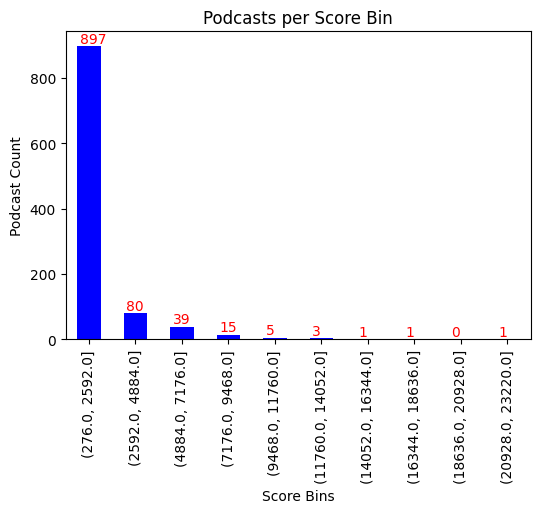

In [116]:
test()